# Analysis of Plant Growth Experiment
_______________________________________
This notebook analyzes the results of an experiment on plant growth, where the goal is to compare the dried weight of plants under three conditions:

Control group (`ctrl`)<br>
Treatment 1 (`trt1`)<br>
Treatment 2 (`trt2`)<br>

The dataset, PlantGrowth, consists of thirty observations with two variables:<br>
**weight**: Numeric values representing the dried weight of plants.<br>
**group**: A factor variable with three levels (ctrl, trt1, and trt2), indicating the treatment applied.<br>

Statistical tests will be performed, including:
**$t$-tests**: To compare the mean weights between specific groups.
**ANOVA**: To assess whether significant differences in mean weights exist across all three groups.
The analysis is aimed at determining whether the treatment conditions have a significant effect on plant growth compared to the control group.
____________________________

In [41]:
# Importing standard libraries

import math  # Mathematical functions
import random  # Functions for generating random numbers
import pandas as pd  # Library for data manipulation and analysis

# Working with numerical arrays
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced statistical plotting

# Libraries for statistical analysis
import itertools  # Functions for creating iterator-based operations
from scipy import stats  # Statistical functions
from scipy.stats import shapiro  # Shapiro-Wilk test for normality
from scipy.stats import levene

# One-way ANOVA function
from scipy.stats import f_oneway

## Data description

In [42]:
## Saving the data
data = pd.read_csv("PlantGrowth.csv")
#data

The data is stored in a format where the groups are not split into different columns. 

In [43]:
# Splitting into three groups.

# The Control group's data
control = data[data['group']=='ctrl']['weight']

# The Treatment one data
trit1 = control = data[data['group']=='trt1']['weight']

# The Treatment two data
trit2 = control = data[data['group']=='trt2']['weight']


In [44]:
# The describe() method provides a statistical summary of the data
# pd.concat concatenates data for better visualization
describe_results = pd.concat([control.describe(),trit1.describe(), trit2. describe()], axis=1)
describe_results.columns= ['control', 'trit1','trit2']
describe_results

,control,trit1,trit2
count,10.000000,10.000000,10.000000
mean,5.526000,4.661000,5.526000
std,0.442573,0.793676,0.442573
min,4.920000,3.590000,4.920000
25%,5.267500,4.207500,5.267500
50%,5.435000,4.550000,5.435000
75%,5.735000,4.870000,5.735000
max,6.310000,6.030000,6.310000


The `trit1` group has a lower average weight (4.66) compared to the `control` and `trit2` groups (both around 5.53).<br>
The `trit1` group also shows more variability in weight (higher standard deviation of 0.79), meaning the weights are more spread out, whereas the other two groups have lower variability (around 0.44).<br>
The `trit1` group also has a wider range of weights, starting from 3.59 (the lowest value) to 6.03 (the highest), while the control and trit2 groups have a more consistent range between 4.92 and 6.31.
In conclusion, the trit1 group stands out with lower and more variable weights, which could indicate that the treatment or condition applied to this group had a different effect compared to the other two groups.

## $t$-test for Independent Groups

The $t$-test is used to determine if the difference between the means of two groups is statistically significant.

When conducting a $t$-test, some [assumptions](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php) should be considered.

### Assumptions for the Independent t-Test

1. Assumption of normality of the dependent variable.
The independent t-test requires that the dependent variable is approximately normally distributed within each group. Can be tested with the Shapiro-Wilk Test.

**The Null hypothesis**: the random variable in the sample is normally distributed.<br>
**The Alternative Hypothesis**: The random variable in the sample is not normally distributed.<br>
The significance level, or alpha level, is the probability of making the wrong decision when the null hypothesis is true (Type I error).
Setting alpha = 0.05, meaning the probability of making a Type I error is 5%.

If **p-value < alpha**, we reject the null hypothesis, indicating that the data likely does not follow a normal distribution.

If **p-value > alpha**, we fail to reject the null hypothesis, meaning we do not have enough evidence to conclude that the sample data does not come from a normal distribution.

In [45]:
# Function for performing the Shapiro-Wilk Test

alpha = 0.05

def test(data_sample, sanificanse_level):
    result = shapiro(data_sample)
    
    if result[1] > alpha:
        print(
            f'We did not get enough evidence to reject The Null Hypothysis \nthat the random variable in the sample is normally distributed. P-Value = {round(result[1],2)}'
        )
    else:
        print(f'There is no evedense to accept The Null Hypothysis. P-Value = {round(result[1],2)}'
        )

print('Results of the Shapiro-Wilk Test for control group:')
print(test(control,alpha))
print('_______________________________________')
print('Results of the Shapiro-Wilk Test for Treatment 1 group:')
print(test(trit1,alpha))
print('_______________________________________')
print('Results of the Shapiro-Wilk Test for Treatment 2 group:')
print(test(trit2,alpha))
print('_______________________________________')


Results of the Shapiro-Wilk Test for control group:
We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.56
None
_______________________________________
Results of the Shapiro-Wilk Test for Treatment 1 group:
We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.45
None
_______________________________________
Results of the Shapiro-Wilk Test for Treatment 2 group:
We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.56
None
_______________________________________


The Shapiro-Wilk Test conducted for the groups shows that the data is normally distributed.

2. The data doesn't contain significant outliers.

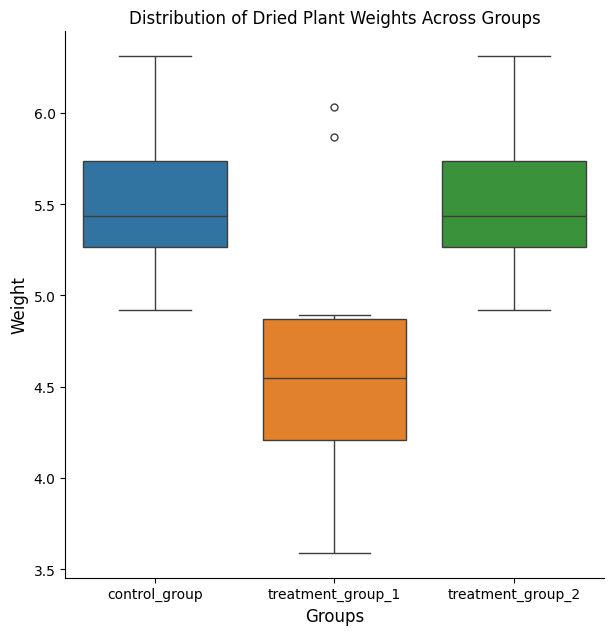

In [46]:
# Boxplot

#Creating a data frame 
df = pd.DataFrame({
    'control_group':control,
    'treatment_group_1':trit1,
    'treatment_group_2':trit2
})

# Creating a box-and-whisker plot to visualize the distribution 
# and determine whether there are significant outliers.
sns.catplot(df, kind='box', height=6)
plt.title("Distribution of Dried Plant Weights Across Groups")
plt.xlabel("Groups", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.show()


In [47]:
trit1.sort_values()

13    3.59
15    3.83
11    4.17
18    4.32
12    4.41
19    4.69
10    4.81
17    4.89
14    5.87
16    6.03
Name: weight, dtype: float64

Outliers were noticed in Treatment Group 1, and the assumptions of the t-test are not met. As a result, the t-test may not provide accurate results. In this case, an alternative statistical test could be considered, or the outliers should be carefully investigated.

3. Assumption of homogeneity of variance.
The assumption of homogeneity of variance is important for a t-test because it ensures that each group's variability is similar, allowing for accurate test statistics and valid p-values.<br>
[Levene’s test](https://www.geeksforgeeks.org/levenes-test/) is used to assess the equality of variance between two different samples. 

**The null hypothesis** for Levene’s test is that the variance among groups is equal.<br>
**The alternative hypothesis** is that the variance among different groups is not equal.

In [48]:
# Levene's Test of Equality of Variances

alpha = 0.05

w_stats, p_value = levene(trit1, trit2,
                          center='mean')
 
if p_value > alpha:
    print("The null hypothesis is not rejected. The variance among groups is equal.")
else:
    print("Reject the Null Hypothesis. The variance among groups is not equal.")

The null hypothesis is not rejected. The variance among groups is equal.


## $t$-test. 
**The $t$-Test** is a statistical test procedure that tests whether there is a significant difference between the means of two groups.

According to the task, it is necessary to determine whether there is a statistically significant difference between Treatment Group 1 and Treatment Group 2. The necessary assumptions have been checked, and outliers were detected in one of the groups, which may affect the accuracy of the test. If the assumptions are not met, alternative tests, such as the Mann-Whitney U test or the Wilcoxon test, may be considered.

### Hypothesis:
**The null hypothesis**: There is no evidence of a significant difference between Treatment Group 1 and Treatment Group 2.<br>
**The alternative hypothesis**: The null hypothesis is not supported. There might be a difference between Treatment Group 1 and Treatment Group 2.




In [49]:
# Two samples
x = trit1
y = trit2

# significance level
alpha = 0.05

# Function for paired t-test:
def indep_ttest(first_sample,second_sample,signif_lv):

    t_stat, p_val = stats.ttest_ind(x,y)

    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    print("------------------------") 

    if p_val <= alpha:
        print('There might be a statistical difference between the two samples.')
    else:
        print('There is no evidence that the difference\nbetween the samples is statistically significant.')    

indep_ttest(x,y,alpha)


t-statistic = -3.0100985421243616
p-value = 0.0075184261182198574
------------------------
There might be a statistical difference between the two samples.


The t-test suggests that there might be a difference between Group 1 and Group 2.

## ANOVA 

**ANOVA** (Analysis of Variance) is a statistical method used to test if there are significant differences between the means of three or more independent groups. It compares the variance within each group to the variance between the groups. The goal of ANOVA is to determine whether any of the group means are significantly different from each other.

The $t$-test is designed to be performed on two groups at a time. Performing multiple t-tests increases the risk of making a Type I error (false positive). ANOVA compares all three groups simultaneously, providing a single test to check for differences across all groups.